In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
penguins_df = pd.read_csv("penguins.csv")

In [3]:
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


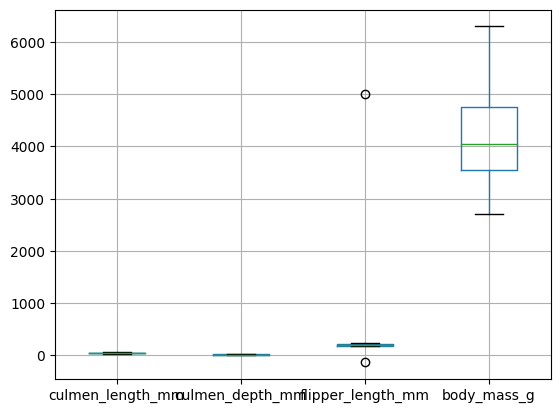

In [4]:
penguins_df.boxplot()
plt.show()

# penguins_df[penguins_df["flipper_length_mm"] > 4000]
# penguins_df[penguins_df["flipper_length_mm"] < 0]

penguins_df = penguins_df.drop([9, 14])

penguins_df = penguins_df.dropna()

In [5]:
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


In [6]:
#Clustering hanya bisa 2 fitur data (x dan y) untuk visualisasi
#Lakukan Encoding untuk kategori data untuk sex itu Encoding Binary (0 atau 1)
#Khusus Clustering diubah kategori data jadi True dan False
df = pd.get_dummies(penguins_df).drop("sex_.", axis=1)

df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True
1,39.5,17.4,186.0,3800.0,True,False
2,40.3,18.0,195.0,3250.0,True,False
4,36.7,19.3,193.0,3450.0,True,False
5,39.3,20.6,190.0,3650.0,False,True


In [7]:
#Z-Score Normalization tiap baris data meannya jadi 0 dan Standar Deviasinya 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(df)

penguins_preprocessed = pd.DataFrame(data = X, columns = df.columns)

penguins_preprocessed.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,1.009050,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,-0.991031,0.997001
5,-0.942311,0.333002,-1.428125,-0.725033,1.009050,-1.003008
6,-0.887125,1.253249,-0.429637,0.579691,-0.991031,0.997001
7,-0.537611,0.230753,-1.356804,-1.253136,1.009050,-1.003008
8,-0.997497,2.071247,-0.714919,-0.507579,-0.991031,0.997001
9,-1.365406,0.333002,-1.142843,-0.631839,1.009050,-1.003008


In [8]:
#Reduksi Dimensi lakukan PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=None)

dfx_pca = pca.fit(penguins_preprocessed)
#Ada nilai minimal dari tiap bagian PCA misalnya di 2 fitur data yang dipangkas mewakili 40% dari keseluruhan data
dfx_pca.explained_variance_ratio_

n_components = sum(dfx_pca.explained_variance_ratio_ > 0.1)

pca = PCA(n_components=n_components)

penguins_PCA = pca.fit_transform(penguins_preprocessed)

print(n_components)

2


c:\Python\environments\deep_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python\environments\deep_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python\environments\deep_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python\environments\deep_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will c

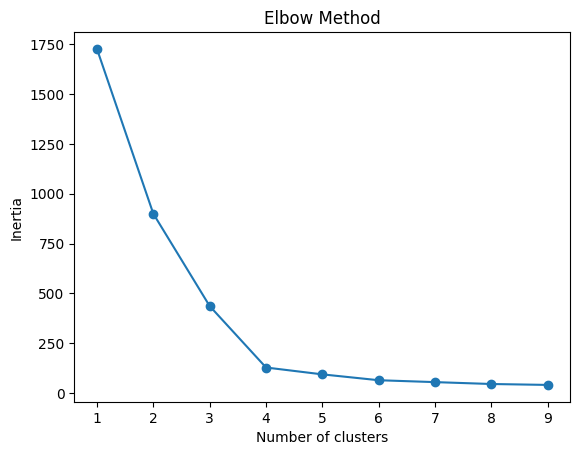

In [9]:
#Cari nilai K optimal
from sklearn.cluster import KMeans

inertia = []

for k in range(1,10):

  kmeans = KMeans(n_clusters = k, random_state=42).fit(penguins_PCA)
  #append.inertia(sum of squared distances to the closest cluster center) to list
  inertia.append(kmeans.inertia_)

plt.plot(range(1,10), inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


c:\Python\environments\deep_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


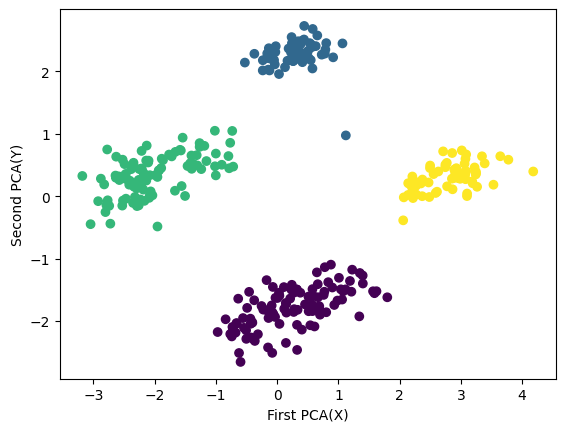

In [10]:
kmeans = KMeans(n_clusters = 4, random_state=42).fit(penguins_PCA)

plt.scatter(penguins_PCA[:,0], penguins_PCA[:,1], c=kmeans.labels_, cmap="viridis")

plt.xlabel("First PCA(X)")
plt.ylabel("Second PCA(Y)")

plt.show()